In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import shapiro
import math
from sklearn.preprocessing import StandardScaler

In [6]:
df_raw_tat= pd.read_csv('~/PDP/Data Set/MFG_TAT.csv',engine='python',encoding='cp949')
df_raw_tat.head()

,JUDGE,INDEX,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,양품,1,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,...,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,양품,2,LOT-101,PNL-02,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,...,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0
2,양품,3,LOT-101,PNL-03,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,...,6597.0,530.0,80.0,420.0,92.0,396.0,86.0,6840.0,0.0,10645.0
3,양품,4,LOT-101,PNL-04,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,...,6420.0,530.0,78.0,429.0,78.0,399.0,90.0,6720.0,0.0,10076.0
4,양품,5,LOT-101,PNL-05,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,...,6453.0,540.0,76.0,363.0,82.0,393.0,84.0,7110.0,0.0,10074.0


In [8]:
def fun_plot_his(data,var):
    plt.hist(data[data['JUDGE']=='양품'][var],label='good',alpha=0.5)
    plt.hist(data[data['JUDGE']=='명점'][var],label='bad',alpha=0.5)
    plt.title(var)
    plt.legend()

/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


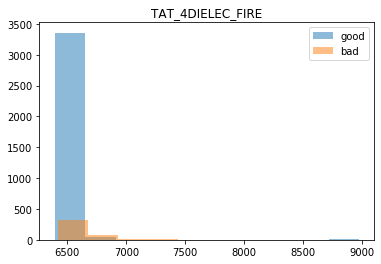

In [9]:
fun_plot_his(df_raw_tat,'TAT_4DIELEC_FIRE')

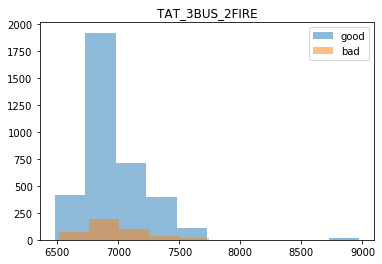

In [10]:
fun_plot_his(df_raw_tat,'TAT_3BUS_2FIRE')

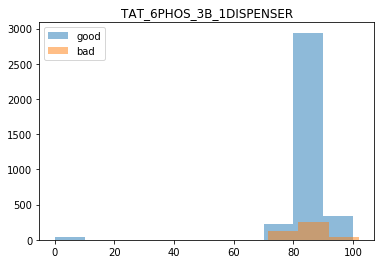

In [11]:
fun_plot_his(df_raw_tat,'TAT_6PHOS_3B_1DISPENSER')

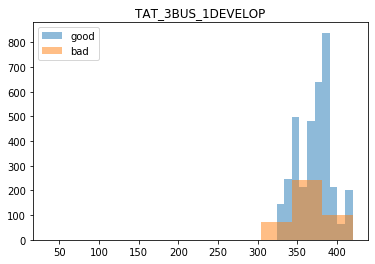

In [12]:
fun_plot_his(df_raw_tat,'TAT_3BUS_1DEVELOP')

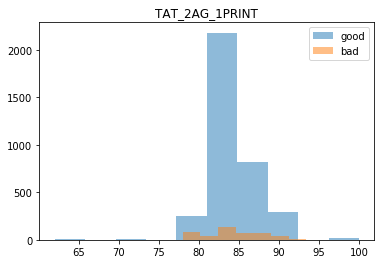

In [13]:
fun_plot_his(df_raw_tat,'TAT_2AG_1PRINT')

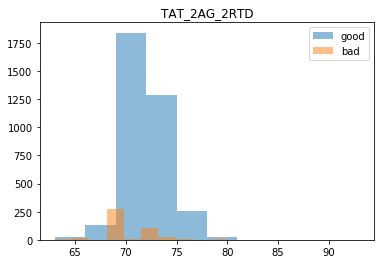

In [14]:
fun_plot_his(df_raw_tat,'TAT_2AG_2RTD')

- DT, RF, GB모델링 작업으로 얻은 변수 중요도를 통해 5개의 변수를 선별했다.
- 각 변수들의 히스토그램을 그려 해당 변수의 요소값(작업시간)을 X값으로 넣고 빈도수를 Y값으로 넣었다.
- 모든 변수들의 양품과 명점의 빈도수를 비교하면 작업시간 별로 비슷한 경향의 빈도수를 보여주고 있다.
- 전체 작업시간 내에 불규칙한 명점 발생의 경향을 보이지 않고 히스토그램을 통해 명점의 발생 유무가 작업시간에 의해 큰 영향을 받는다고 판단하기 어렵다. 그러므로 작업시간 변수는 명점 발생에 충분한 설명력을 갖추지 않아 분석에서 제외 한다.

# 정규성 판단

In [16]:
!pip install graphviz

In [20]:
good=[]
bad=[]
col_name=['TAT_4DIELEC_FIRE']
for i in range(len(df_raw_tat)):
    if math.isnan(df_raw_tat['TAT_4DIELEC_FIRE'][i])==False and df_raw_tat['JUDGE'][i]=='양품':
        good.append(float(df_raw_tat['TAT_4DIELEC_FIRE'][i]))
    elif math.isnan(df_raw_tat['TAT_4DIELEC_FIRE'][i])==False and df_raw_tat['JUDGE'][i]=='명점':
        bad.append(float(df_raw_tat['TAT_4DIELEC_FIRE'][i]))
good1=pd.DataFrame(good,columns=col_name)
bad1=pd.DataFrame(bad,columns=col_name)

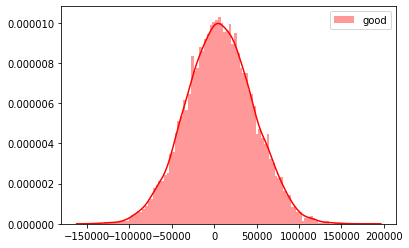

In [21]:
mu= np.mean(good1)
sigma=np.std(good1)
normal = norm.rvs(size=10000, loc=mu, scale=np.var(good1))
ax = sns.distplot(normal, bins = 100, kde=True, color='red',label='good',hist=True)
plt.legend()

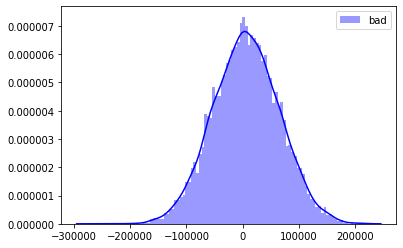

In [22]:
mu= np.mean(bad1)
sigma=np.std(bad1)
normal = norm.rvs(size=10000, loc=mu, scale=np.var(bad1))
ax = sns.distplot(normal, bins = 100, kde=True, color='blue',label='bad',hist=True)
plt.legend()